# Case Study(Reinforcement Learning)

### Name : Sujatha S
### Roll No : AA.SC.P2MCA2107441

## Problem Definition
- #### To build autonomous robots for a guitar building factory. An autonomous robot is a robot that acts without recourse to human control.
- #### These robots will help the guitar makers by conveying them the necessary guitar parts that they would need to craft a guitar.
- #### In this case study, we solve this problem using reinforcement learning and train the robot using Q-learning algorithm to transport various guitar body parts to the assembling area(target).


## Importing Libraries

In [1]:
#import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy


#### Defining State Space of the environment

In [2]:
#define the states
environment_rows = 50
environment_columns = 50

#Creating a 3D numpy array to hold the current Q-values for each state and action pair: Q(s, a) 
#The value of each (state, action) pair is initialized to 0.
q_values = np.zeros((environment_rows, environment_columns, 4))

#### Defining Action Space 

In [3]:
#define actions
#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

#### Defining Reward Functions

In [4]:
#Create a 2D numpy array to hold the rewards for each state. 
#The array contains 50 rows and 50 columns, and each value is initialized to -100.
rewards = np.full((environment_rows, environment_columns), -100.)

rewards[0, 5] = 999. #set the reward for the assembling area(target 1)
rewards[0, 25] = 999. #set the reward for the assembling area(target 2)
rewards[0, 45] = 999. #set the reward for the assembling area(target 3)


#define aisle locations for rows 1 through 48
aisles = {} #store locations in a dictionary
aisles[1] = [i for i in range(1, 49)]
aisles[2] = [1, 11, 19, 27, 36, 43, 47, 48]
aisles[3] = [1, 11, 19, 27, 36, 43, 47, 48]
aisles[4] = [i for i in range(1, 6)]
aisles[4].extend([i for i in range(7, 23)])
aisles[4].extend([i for i in range(25, 46)])
aisles[4].extend([47, 48])
aisles[5] = [1,5]
aisles[5].extend([i for i in range(7, 23)])
aisles[5].extend([i for i in range(25, 33)])
aisles[5].extend([i for i in range(35, 46)])
aisles[5].extend([47, 48])
aisles[6] = [1, 2, 3, 5]
aisles[6].extend([i for i in range(7, 23)])
aisles[6].extend([i for i in range(29, 33)])
aisles[6].extend([i for i in range(35, 46)])
aisles[6].extend([47, 48])
aisles[7] = [1, 2, 3, 5, 6, 7, 21, 22, 29, 30, 31, 32, 35, 47, 48]
aisles[8] = [5, 6, 7, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 35, 47, 48]
aisles[9] = [i for i in range(0, 23)]
aisles[9].extend([25, 26])
aisles[9].extend([i for i in range(29, 46)])
aisles[10] = [i for i in range(0, 23)]
aisles[10].extend([25, 26])
aisles[10].extend([i for i in range(29, 50)])
aisles[11] = [5, 20, 25, 26, 32, 48]
aisles[12] = [5, 20, 25, 26, 32, 48]
aisles[13] = [i for i in range(0, 50)]
aisles[14] = [i for i in range(0, 50)]
aisles[15] = [20, 21, 22, 25, 26, 44]
aisles[16] = [i for i in range(1, 23)]
aisles[16].extend([25, 26])
aisles[16].extend([i for i in range(29, 38)])
aisles[16].extend([i for i in range(40, 49)])
aisles[17] = [i for i in range(1, 23)]
aisles[17].extend([i for i in range(29, 38)])
aisles[17].extend([i for i in range(40, 49)])
aisles[18] = [1, 2, 3, 12, 13, 14, 15]
aisles[18].extend([i for i in range(29, 38)])
aisles[18].extend([i for i in range(40, 45)])
aisles[18].extend([47, 48])
aisles[19] = [1, 2, 3, 12, 13, 14, 15]
aisles[19].extend([25, 26])
aisles[19].extend([i for i in range(29, 38)])
aisles[19].extend([i for i in range(40, 45)])
aisles[19].extend([47, 48])
aisles[20] = [1, 2, 3]
aisles[20].extend([i for i in range(6, 45)])
aisles[20].extend([47, 48])
aisles[21] = [1, 2, 3]
aisles[21].extend([i for i in range(6, 30)])
aisles[21].extend([i for i in range(32, 45)])
aisles[21].extend([47, 48]) 
aisles[22] = [1, 2, 3]
aisles[22].extend([i for i in range(6, 30)])
aisles[22].extend([i for i in range(32, 45)])
aisles[22].extend([47, 48]) 
aisles[23] = [1, 2, 3, 25, 26, 27, 28, 29]
aisles[23].extend([i for i in range(32, 45)]) 
aisles[23].extend([47, 48])
aisles[24] = [1, 2, 3, 25, 26, 27, 28, 29, 47, 48]
aisles[25] = [1, 2, 3]
aisles[25].extend([i for i in range(6, 30)]) 
aisles[25].extend([47, 48])
aisles[26] = [1, 2, 3]
aisles[26].extend([i for i in range(6, 49)])
aisles[27] = [1, 2, 3]
aisles[27].extend([i for i in range(6, 49)])
aisles[28] = [1, 2, 3, 25, 26]
aisles[29] = [1, 2, 3, 25, 26]
aisles[30] = [i for i in range(0, 50)]       
aisles[31] = [i for i in range(0, 50)]       
aisles[32] = [8, 30, 46]       
aisles[33] = [8, 30, 46]
aisles[34] = [i for i in range(1, 12)]
aisles[34].extend([i for i in range(13, 49)])
aisles[35] = [i for i in range(1, 12)]
aisles[35].extend([i for i in range(13, 49)])
aisles[36] = [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17]
aisles[36].extend([i for i in range(19, 33)])
aisles[36].extend([i for i in range(34, 43)])
aisles[36].extend([44, 45, 47, 48])
aisles[37] = [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19]
aisles[37].extend([i for i in range(21, 33)])
aisles[37].extend([i for i in range(34, 43)])
aisles[37].extend([44, 45, 47, 48])
aisles[38] = [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19]
aisles[38].extend([i for i in range(34, 43)])
aisles[38].extend([44, 45, 47, 48])
aisles[39] = [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17]
aisles[39].extend([i for i in range(19, 33)])
aisles[39].extend([i for i in range(34, 43)])
aisles[39].extend([44, 45, 47, 48])
aisles[40] = [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19, 23, 24,
             28, 29, 31, 32, 38, 39, 44, 45, 46, 47, 48]
aisles[41] = [1, 2, 4, 5, 9, 10, 14, 15, 17, 23, 24,
             28, 29, 31, 32, 38, 39, 44, 45, 46, 47, 48]
aisles[42] = [1, 2, 4, 5]
aisles[42].extend([i for i in range(7, 16)])
aisles[42].extend([17, 18])
aisles[42].extend([i for i in range(20, 30)])
aisles[42].extend([31, 32])
aisles[42].extend([i for i in range(34, 43)])
aisles[42].extend([44, 45, 47, 48])
aisles[43] = [1, 2, 4, 5]
aisles[43].extend([i for i in range(7, 16)])
aisles[43].extend([17, 18])
aisles[43].extend([i for i in range(20, 30)])
aisles[43].extend([31, 32])
aisles[43].extend([i for i in range(34, 46)])
aisles[43].extend([47, 48])
aisles[44] = [1, 2, 4, 5]
aisles[44].extend([i for i in range(7, 16)])
aisles[44].extend([17, 18])
aisles[44].extend([i for i in range(20, 30)])
aisles[44].extend([31, 32])
aisles[44].extend([i for i in range(34, 43)])
aisles[44].extend([44, 45, 47, 48])
aisles[45] = [4, 5, 13, 17, 18, 31, 32, 44, 45]
aisles[46] = [i for i in range(0, 50)]
aisles[47] = [10, 11, 23, 24, 37, 38]
aisles[48] = [i for i in range(0, 50)]


#set the rewards for all aisle locations
for row_index in range(1, 49):
    for column_index in aisles[row_index]:
        rewards[row_index, column_index] = -1.
  


#### Visualizing the environment grid

In [5]:
disp_path = deepcopy(rewards)

for row_index in range(1, 49):
    for column_index in aisles[row_index]:
        disp_path[row_index, column_index] = 500

<AxesSubplot:>

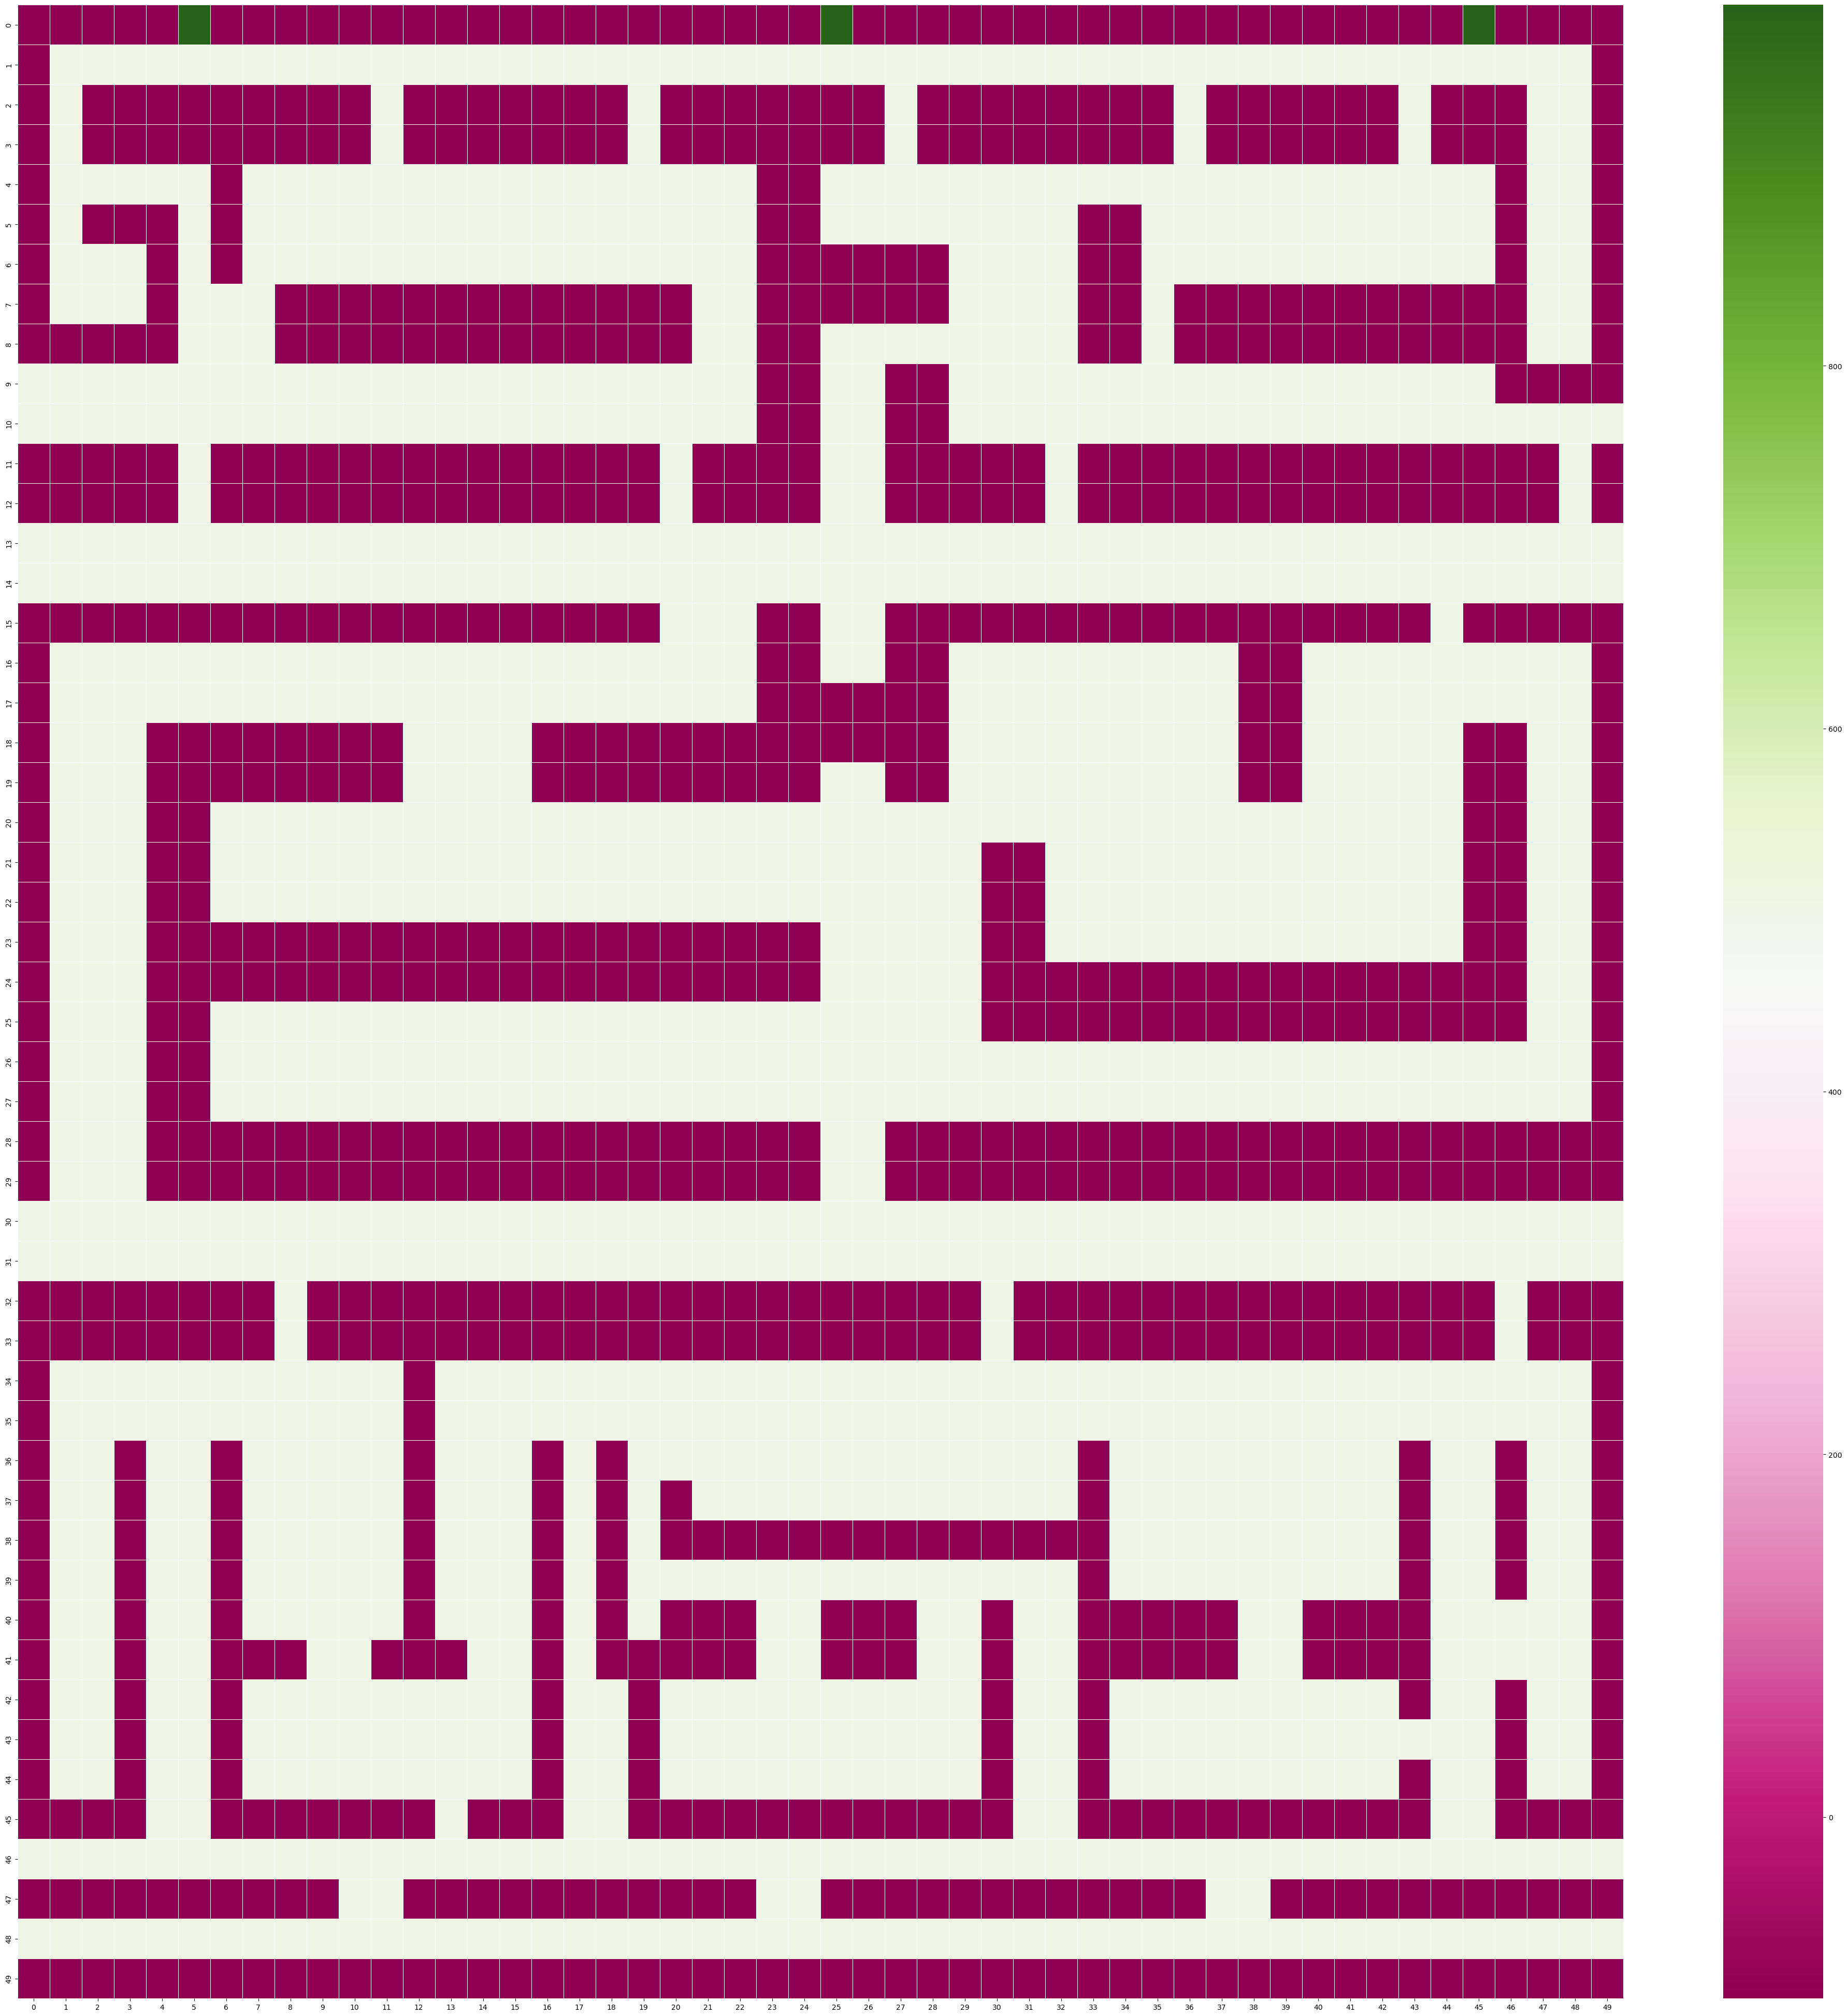

In [6]:
fig, ax = plt.subplots(figsize=(50,50))         
sns.heatmap(disp_path,cmap='PiYG', annot=False, linewidths=.5, ax=ax)

## Train the model

#### The following functions help us in training the Agent/Robot

In [7]:
# function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
    #if the reward for this location is -1, then it is not a terminal state
    if rewards[current_row_index, current_column_index] == -1.:
        return False
    else:
        return True

# function that will choose a random, non-terminal starting location
def get_starting_location():
    # get a random row and column index
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
    # continue choosing random row and column indexes until a non-terminal state is identified
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(environment_rows)
        current_column_index = np.random.randint(environment_columns)
    return current_row_index, current_column_index

# define an epsilon greedy algorithm that will choose which action to take next
def get_next_action(current_row_index, current_column_index, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else: #choose a random action
        return np.random.randint(4)

# function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

# function that will get the shortest path between any location within the warehouse that 
# the robot is allowed to travel and the assembling areas(target1, target2, target3).
def get_shortest_path(start_row_index, start_column_index):
    # return immediately if this is an invalid starting location
    if is_terminal_state(start_row_index, start_column_index):
        return []
    else: # if this is a 'legal' starting location
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
        # continue moving along the path until we reach any target 
        while not is_terminal_state(current_row_index, current_column_index):
            # get the best action to take
            action_index = get_next_action(current_row_index, current_column_index, 1.)
            # move to the next location on the path, and add the new location to the list
            current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
            shortest_path.append([current_row_index, current_column_index])
        return shortest_path

## Train the Agent

In [8]:
# define training parameters
epsilon = 0.9 
discount_factor = 0.9 
learning_rate = 0.9 

# run through 25000 training episodes
for episode in range(25000):
    # get the starting location for this episode
    row_index, column_index = get_starting_location()

    # continue taking actions until we reach a terminal state
    # (until we reach the item assembling area or crash into an item storage location)
    while not is_terminal_state(row_index, column_index):
        # choose which action to take 
        action_index = get_next_action(row_index, column_index, epsilon)

        # perform the chosen action, and transition to the next state
        old_row_index, old_column_index = row_index, column_index # store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
    
        # receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

        # update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value



## Visualize the path taken

In [9]:
# visualize the path taken by the robot to reach assembling area(target)
def print_path(shortest_path):
    # initial grid 
    disp_path[0, 5] = 999.
    disp_path[0, 25] = 999.
    disp_path[0, 45] = 999. 
    for row_index in range(1, 49):
        for column_index in aisles[row_index]:
            disp_path[row_index, column_index] = 500
    # current path
    for i in shortest_path:
        disp_path[i[0], i[1]] = 200
    fig, ax = plt.subplots(figsize=(50,50))         
    sns.heatmap(disp_path,cmap='PiYG', annot=False, linewidths=.5, ax=ax)

In [10]:
# display shortest path
path = get_shortest_path(48, 49)
print(path)


[[48, 49], [48, 48], [48, 47], [48, 46], [48, 45], [48, 44], [48, 43], [48, 42], [48, 41], [48, 40], [48, 39], [48, 38], [47, 38], [46, 38], [46, 39], [46, 40], [46, 41], [46, 42], [46, 43], [46, 44], [45, 44], [44, 44], [43, 44], [43, 43], [43, 42], [43, 41], [43, 40], [43, 39], [42, 39], [41, 39], [40, 39], [39, 39], [38, 39], [38, 38], [37, 38], [36, 38], [36, 37], [35, 37], [34, 37], [34, 36], [34, 35], [34, 34], [34, 33], [34, 32], [34, 31], [34, 30], [33, 30], [32, 30], [31, 30], [30, 30], [30, 29], [30, 28], [30, 27], [30, 26], [29, 26], [28, 26], [27, 26], [26, 26], [25, 26], [24, 26], [23, 26], [22, 26], [21, 26], [20, 26], [20, 25], [20, 24], [20, 23], [20, 22], [20, 21], [20, 20], [20, 19], [20, 18], [20, 17], [20, 16], [20, 15], [19, 15], [18, 15], [17, 15], [16, 15], [16, 16], [16, 17], [16, 18], [16, 19], [16, 20], [15, 20], [14, 20], [13, 20], [12, 20], [11, 20], [10, 20], [9, 20], [9, 21], [8, 21], [7, 21], [6, 21], [5, 21], [4, 21], [4, 20], [4, 19], [3, 19], [2, 19], 

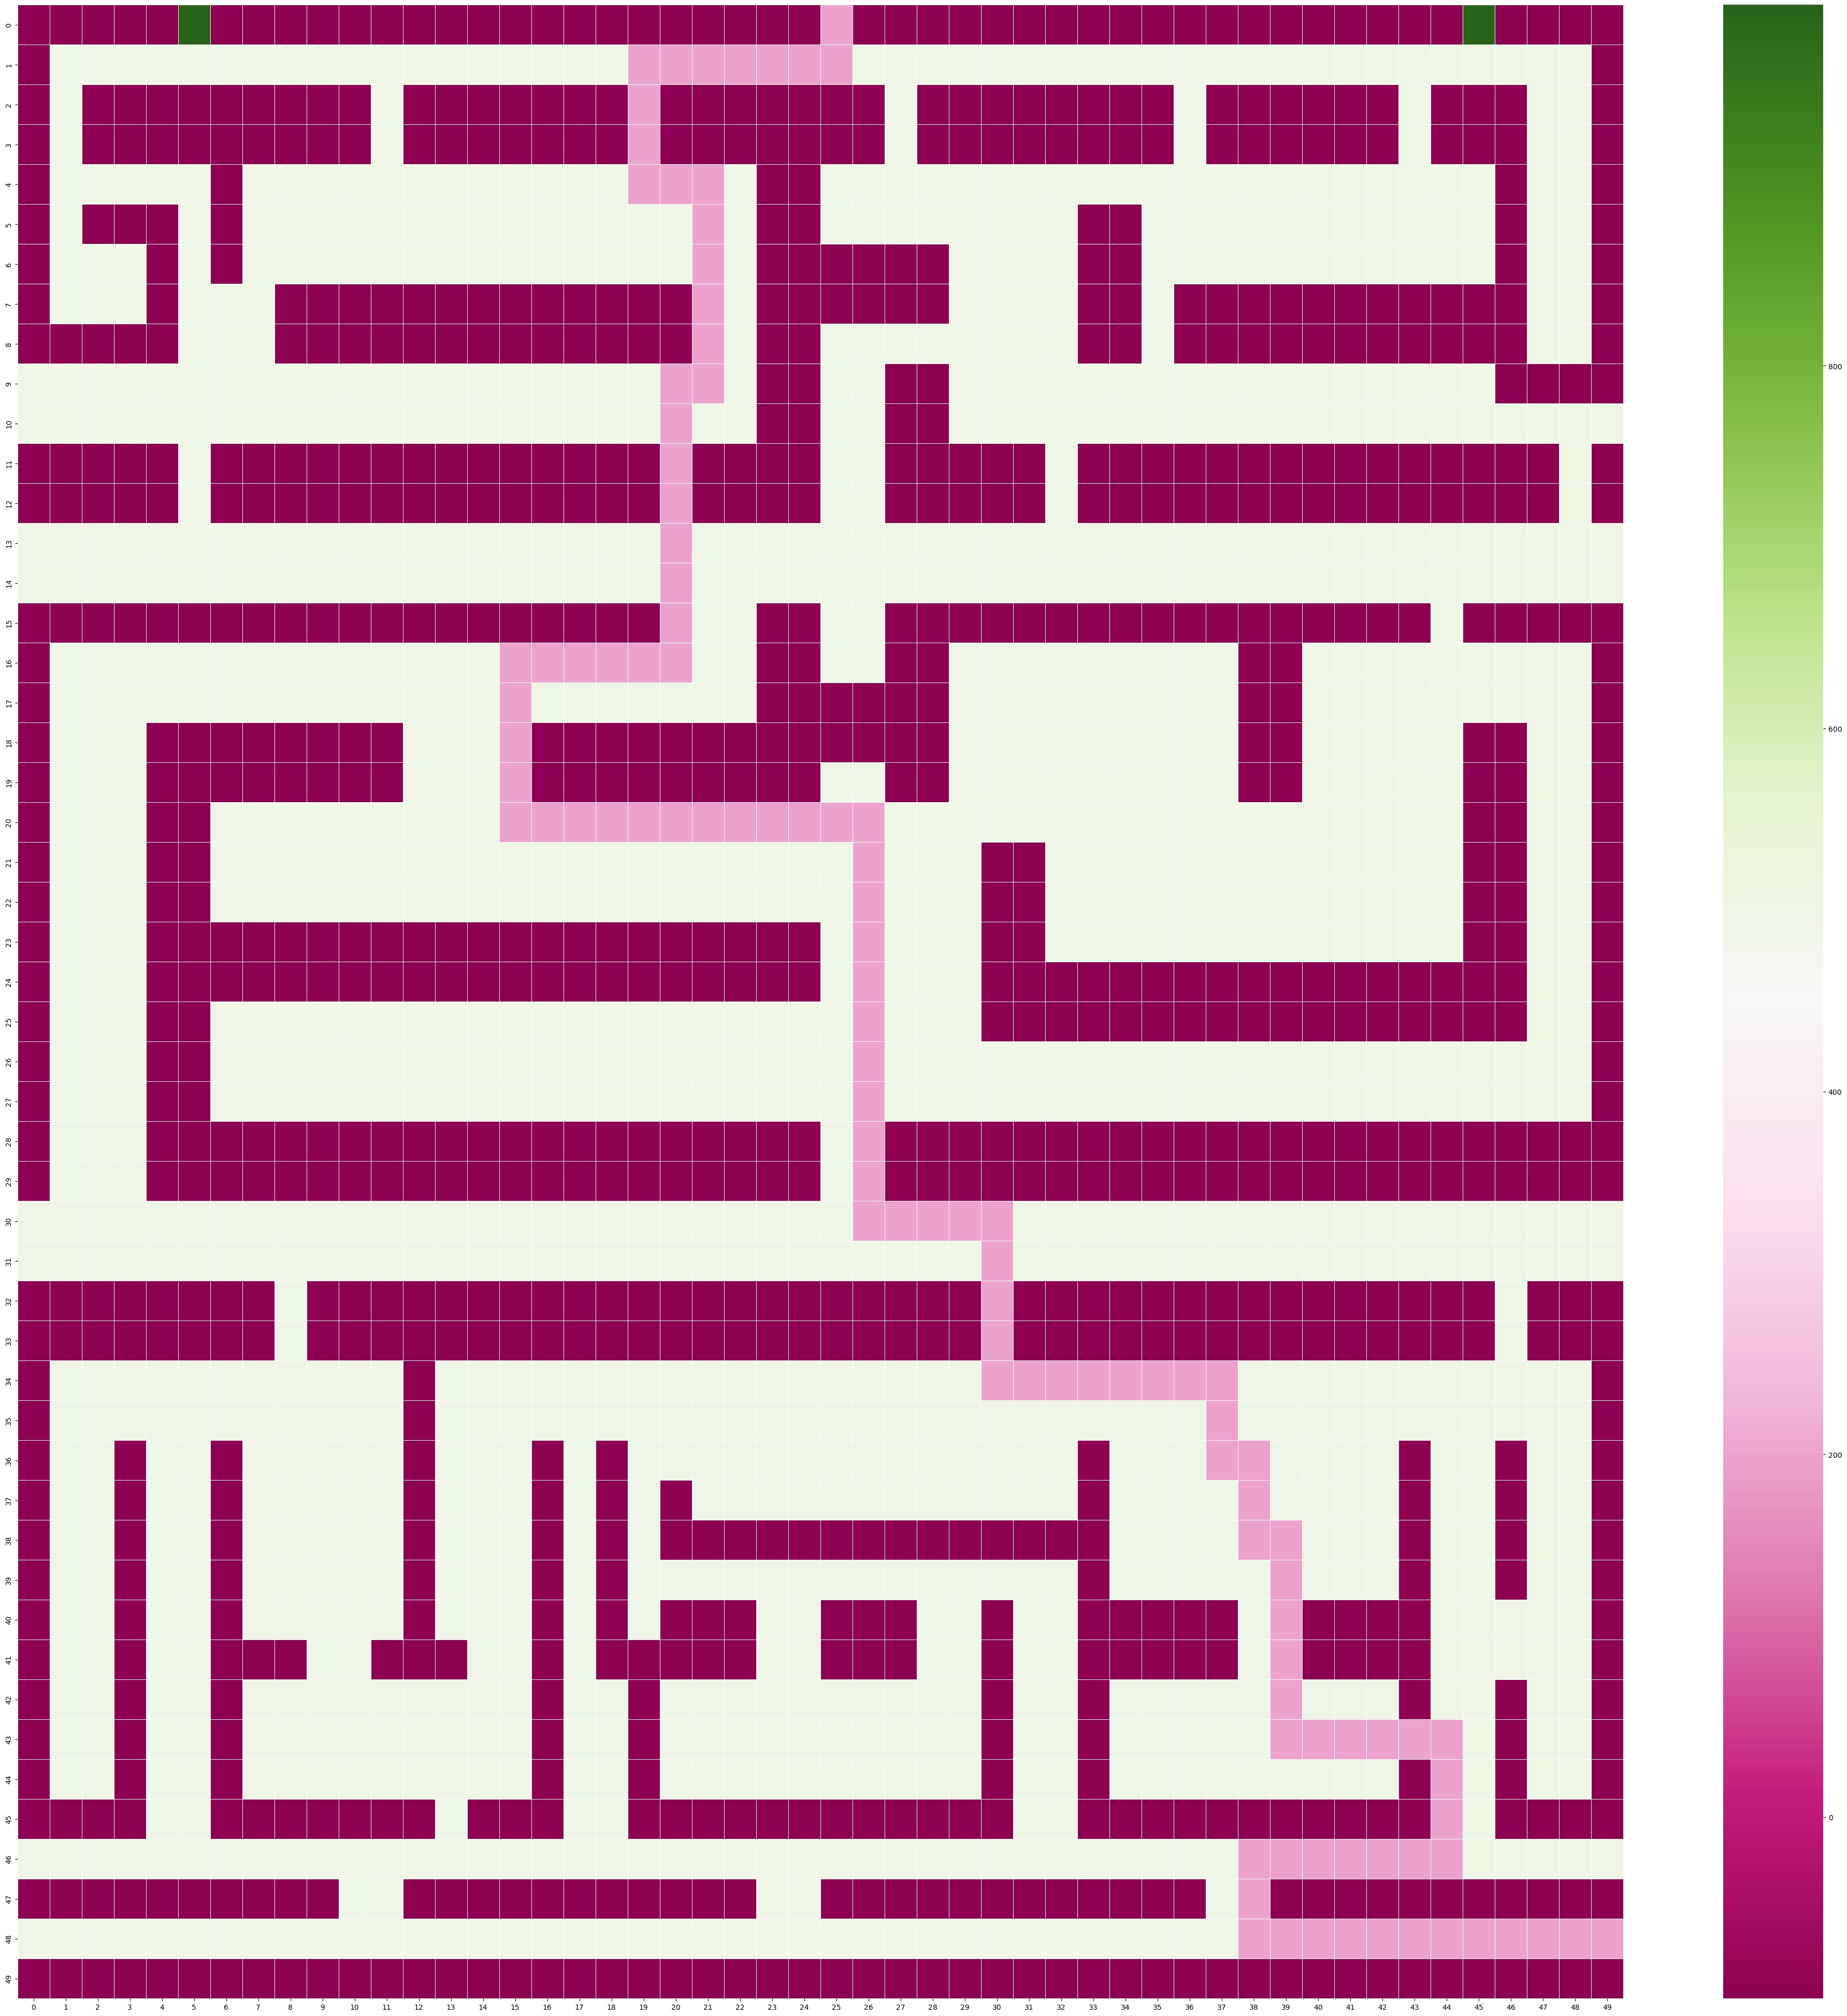

In [11]:
print_path(path)

In [12]:
# display shortest path
path = get_shortest_path(14, 0)
print(path)

[[14, 0], [14, 1], [14, 2], [14, 3], [14, 4], [14, 5], [13, 5], [12, 5], [11, 5], [10, 5], [9, 5], [8, 5], [7, 5], [6, 5], [5, 5], [4, 5], [4, 4], [4, 3], [4, 2], [4, 1], [3, 1], [2, 1], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [0, 5]]


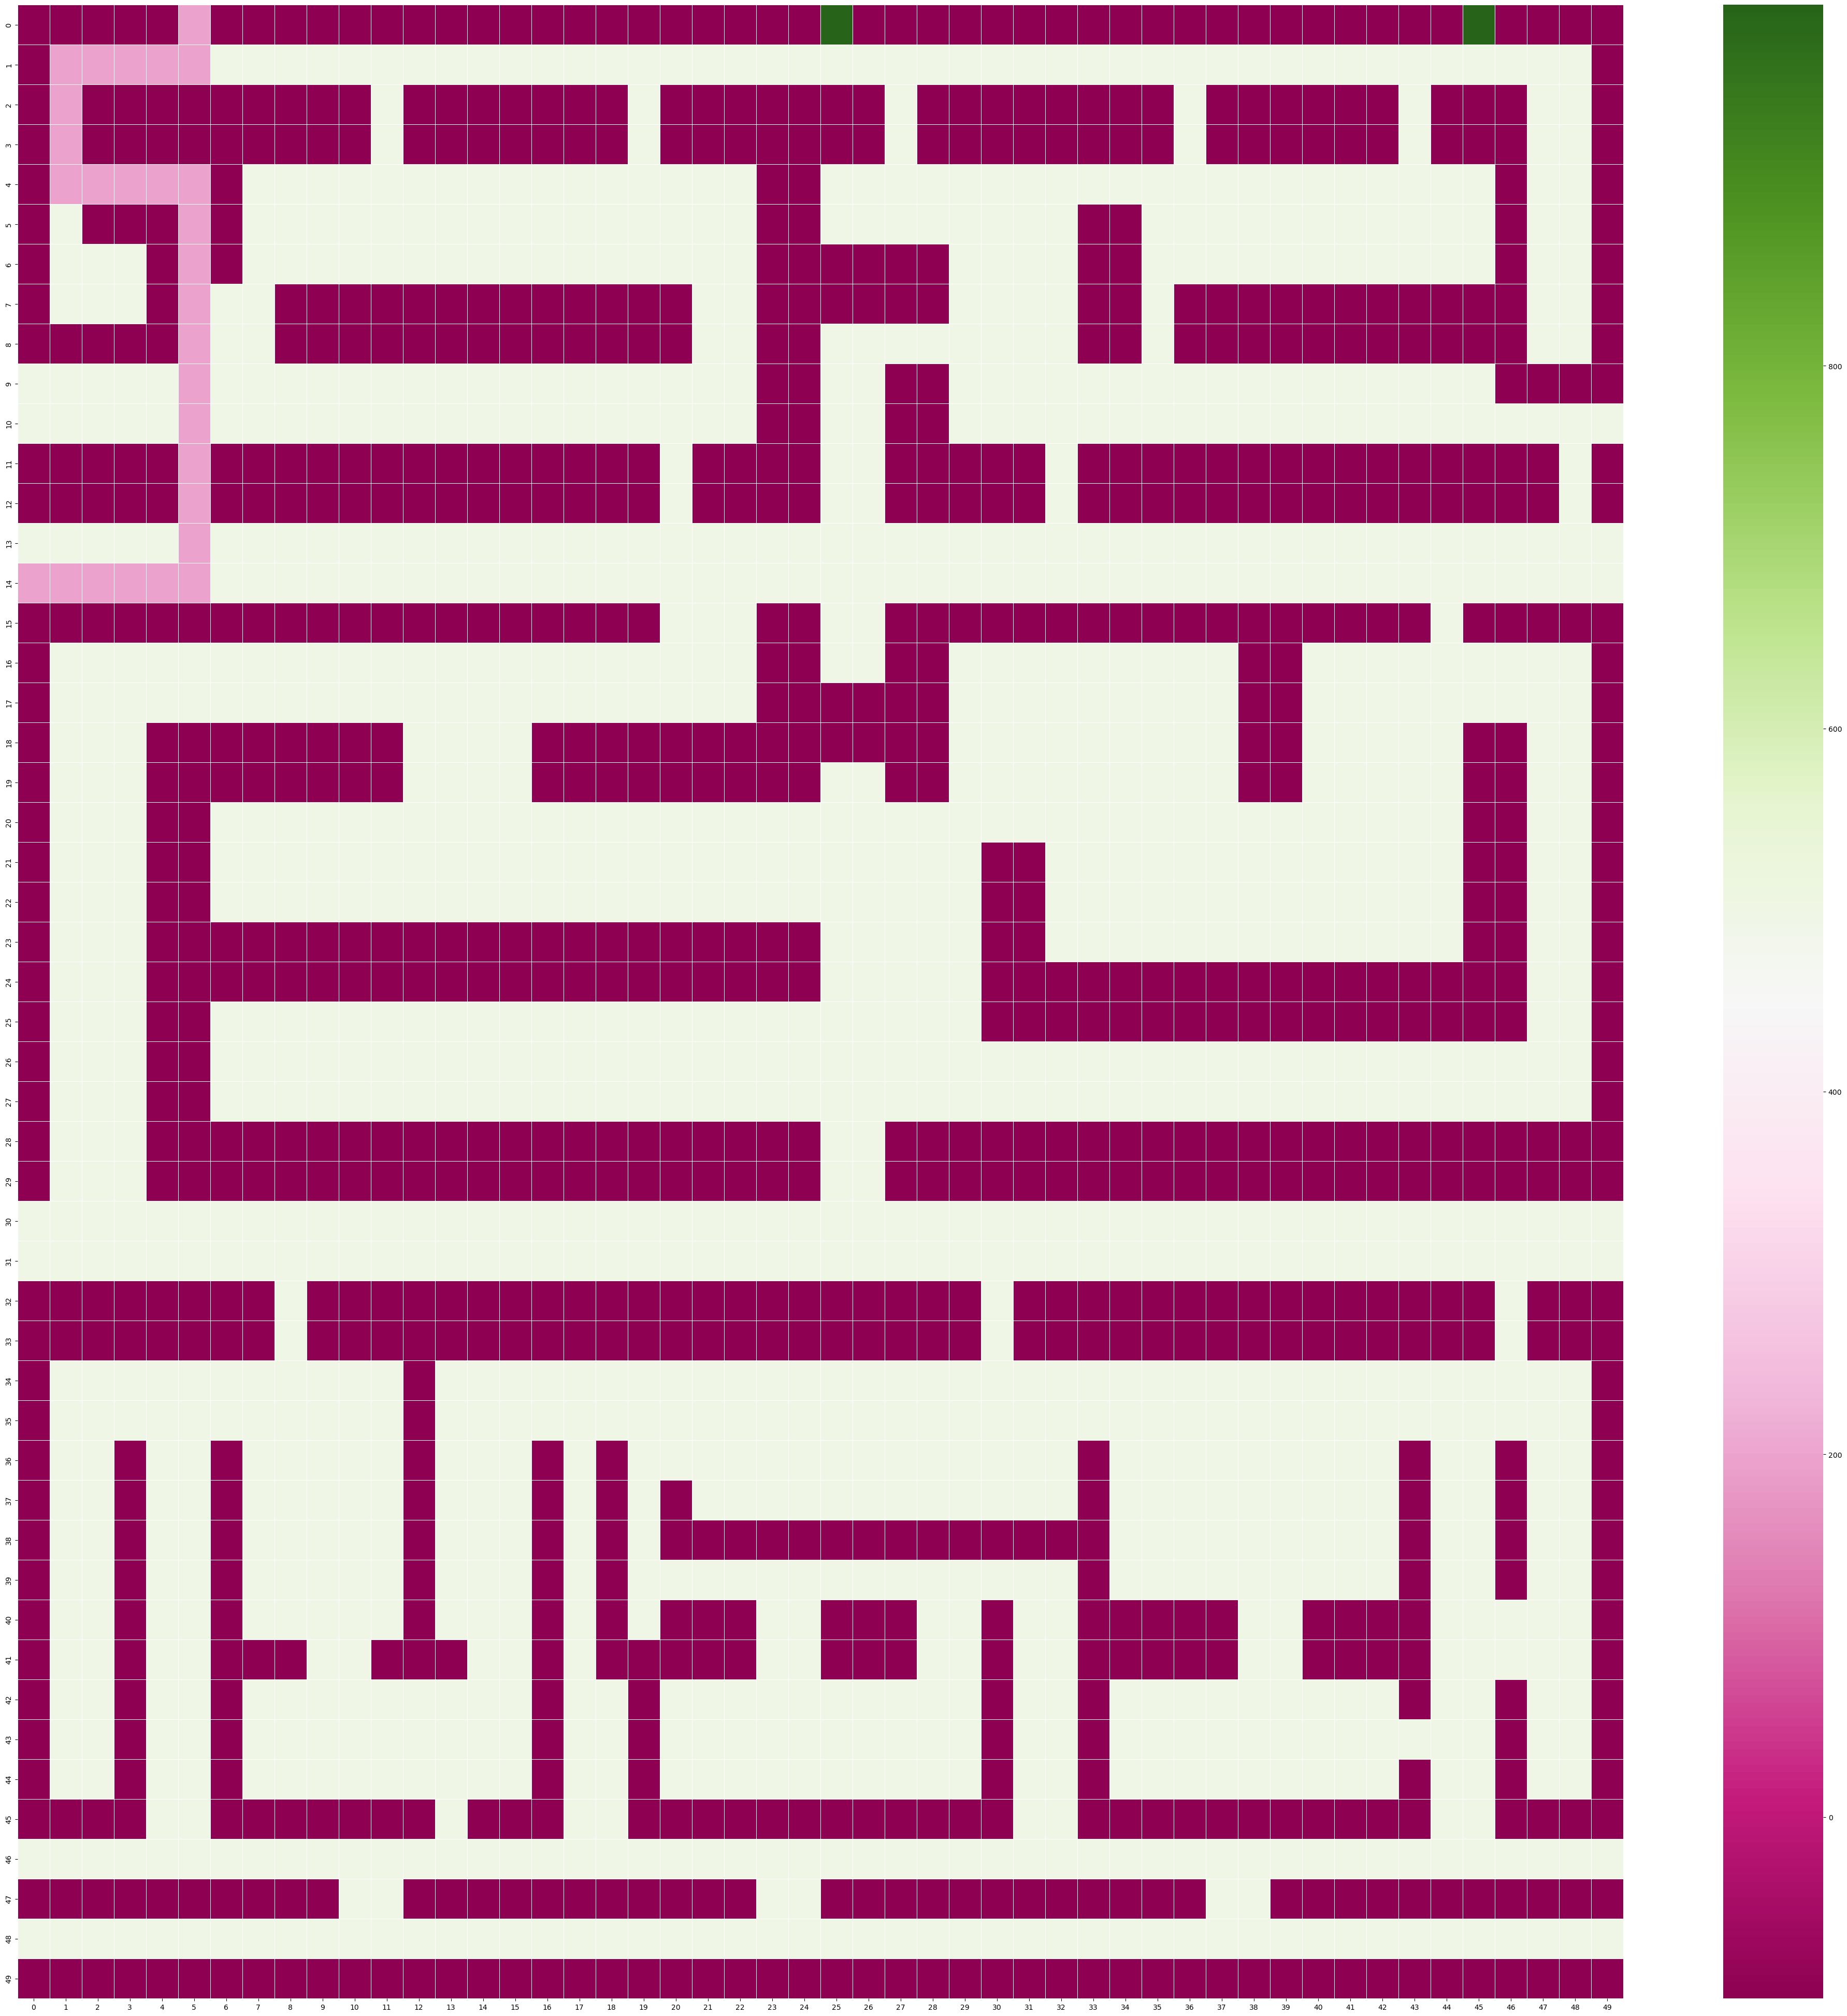

In [13]:
print_path(path)

In [14]:
# display shortest path
path = get_shortest_path(6, 40)
print(path)

[[6, 40], [5, 40], [5, 41], [4, 41], [4, 42], [4, 43], [3, 43], [2, 43], [1, 43], [1, 44], [1, 45], [0, 45]]


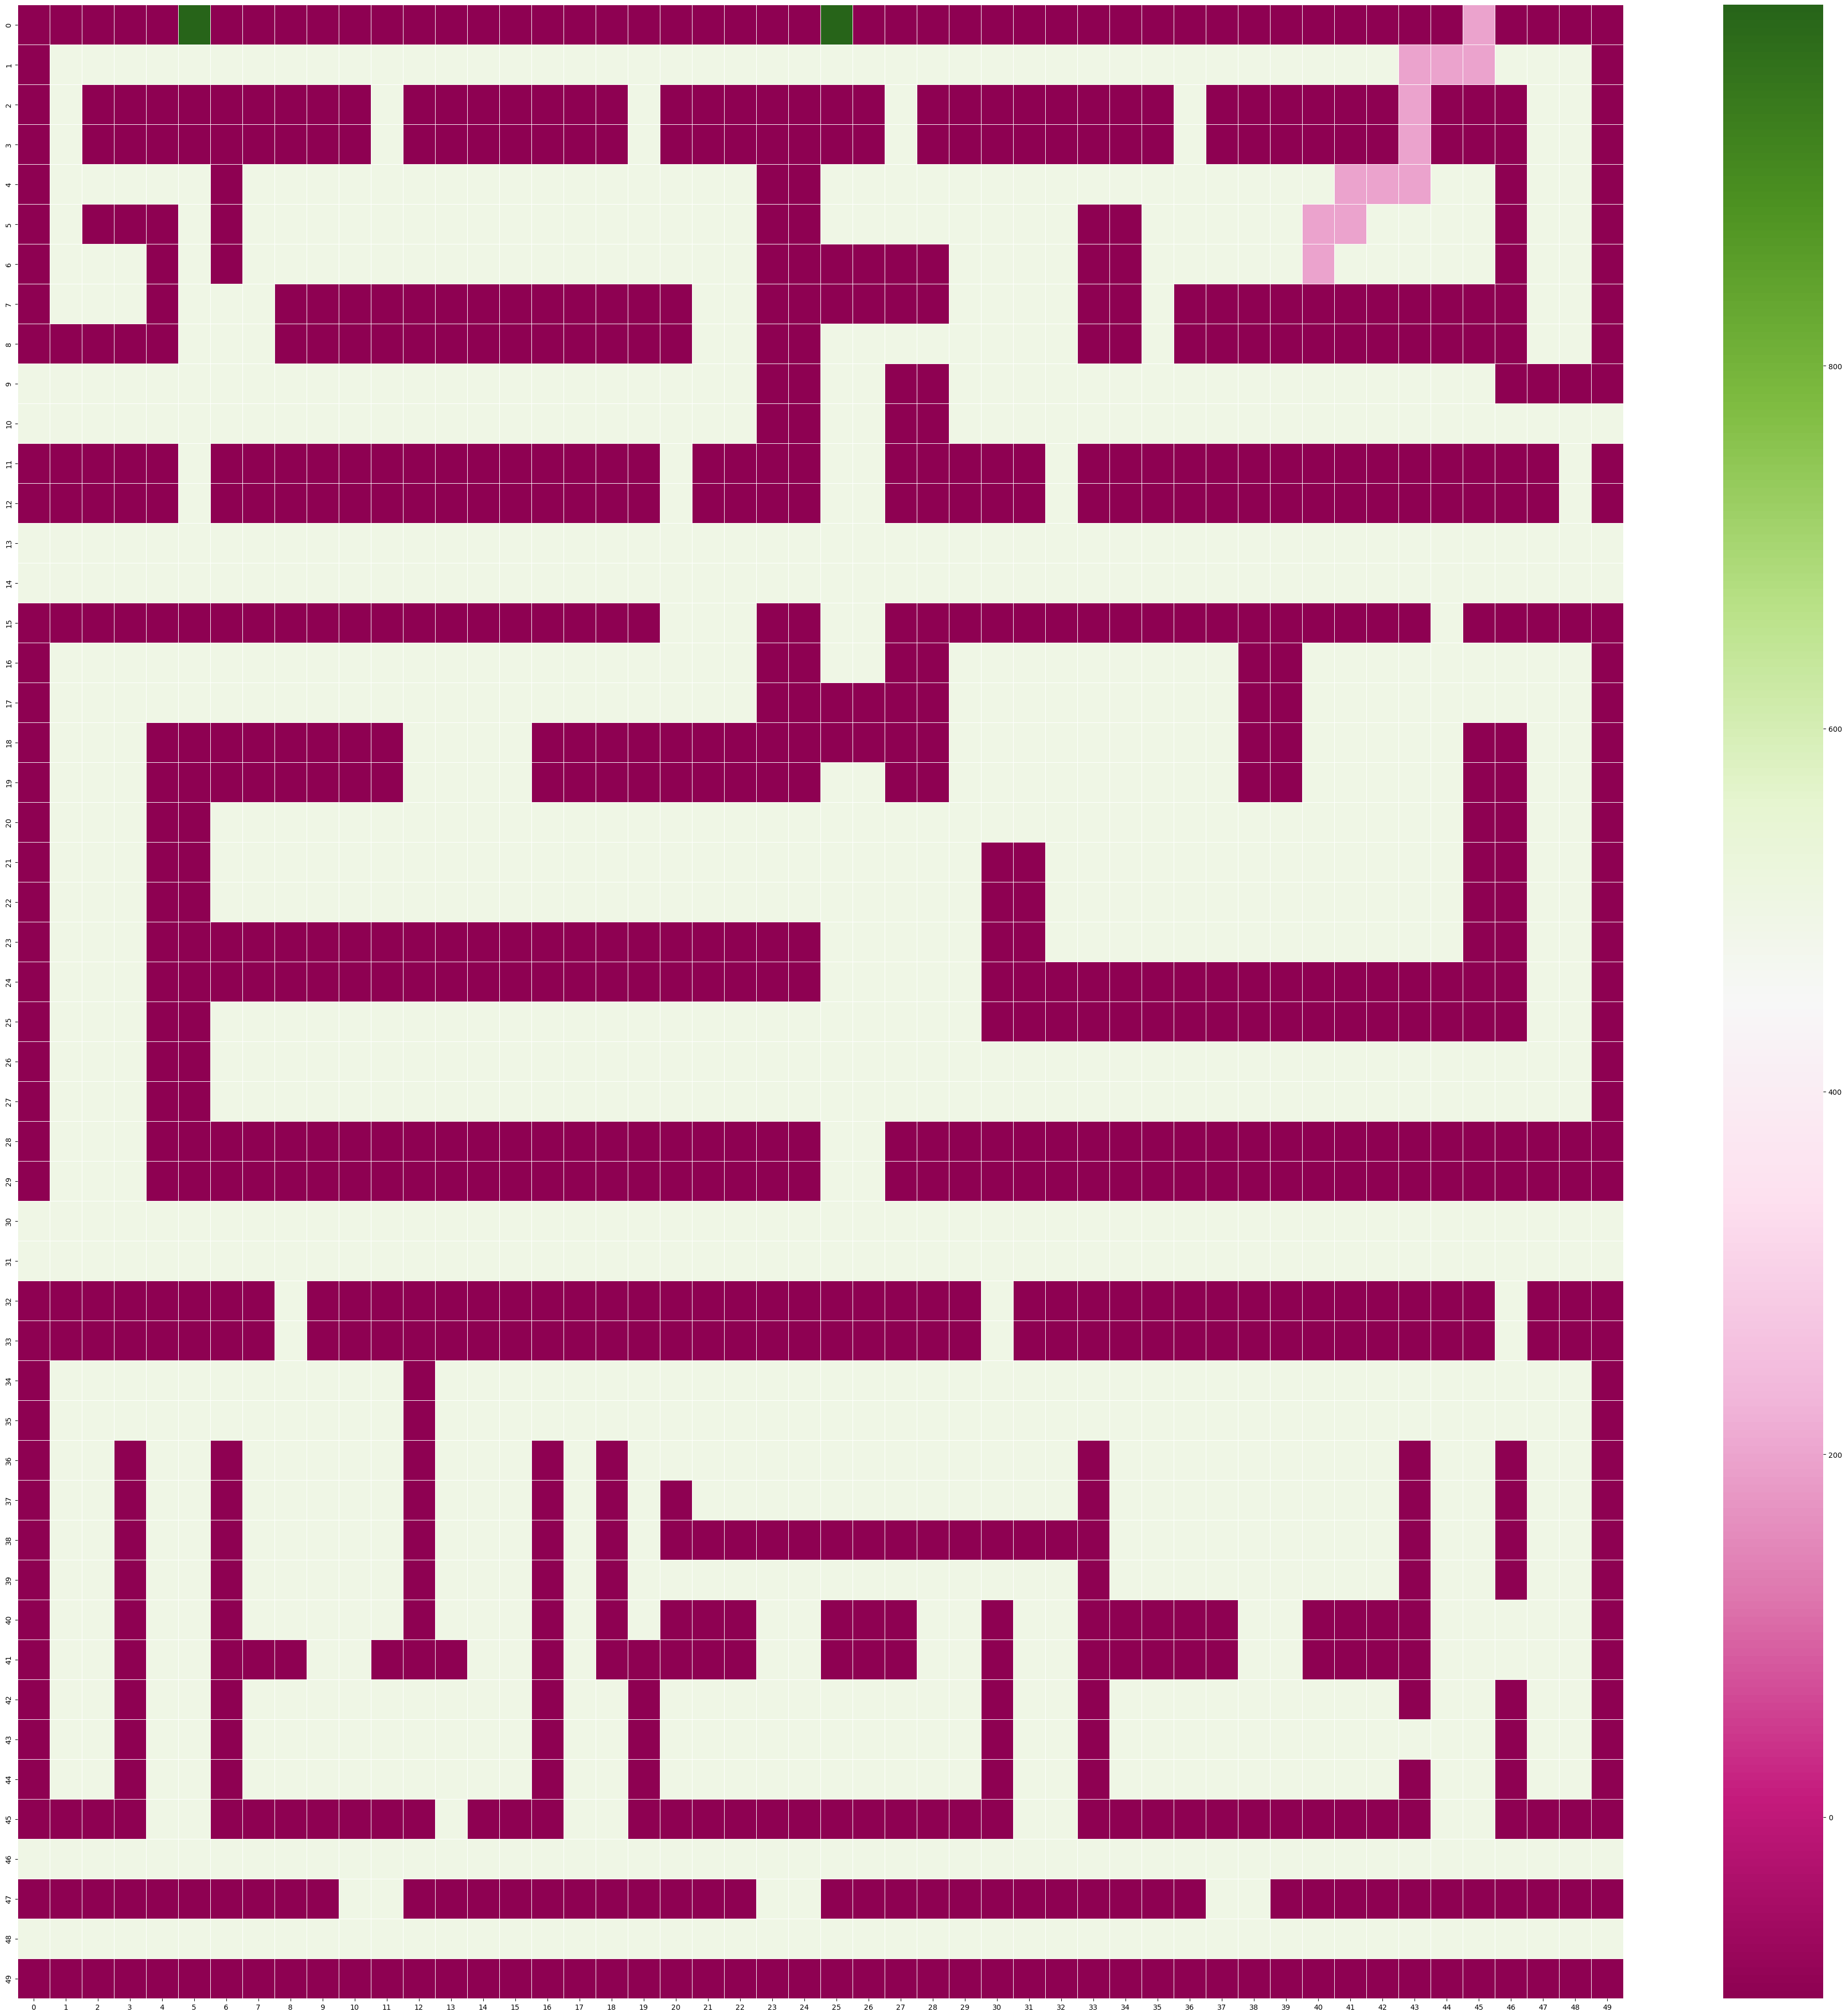

In [15]:
print_path(path)

In [16]:
# visualize the path taken by the robot to reach assembling area(target)
def print_path_reversed(shortest_path):
    # initial grid 
    disp_path[0, 5] = 999.
    disp_path[0, 25] = 999.
    disp_path[0, 45] = 999. 
    for row_index in range(1, 49):
        for column_index in aisles[row_index]:
            disp_path[row_index, column_index] = 500
    # current path
    for i in shortest_path:
        disp_path[i[0], i[1]] = 700
    fig, ax = plt.subplots(figsize=(50,50))         
    sns.heatmap(disp_path,cmap='PiYG', annot=False, linewidths=.5, ax=ax)

In [17]:
#reversed shortest path from assembling area to any valid location
path = get_shortest_path(18, 15) 
path.reverse()
print(path)

[[0, 25], [1, 25], [1, 24], [1, 23], [1, 22], [1, 21], [1, 20], [1, 19], [2, 19], [3, 19], [4, 19], [4, 20], [4, 21], [5, 21], [6, 21], [7, 21], [8, 21], [9, 21], [9, 20], [10, 20], [11, 20], [12, 20], [13, 20], [14, 20], [15, 20], [16, 20], [16, 19], [16, 18], [16, 17], [16, 16], [16, 15], [17, 15], [18, 15]]


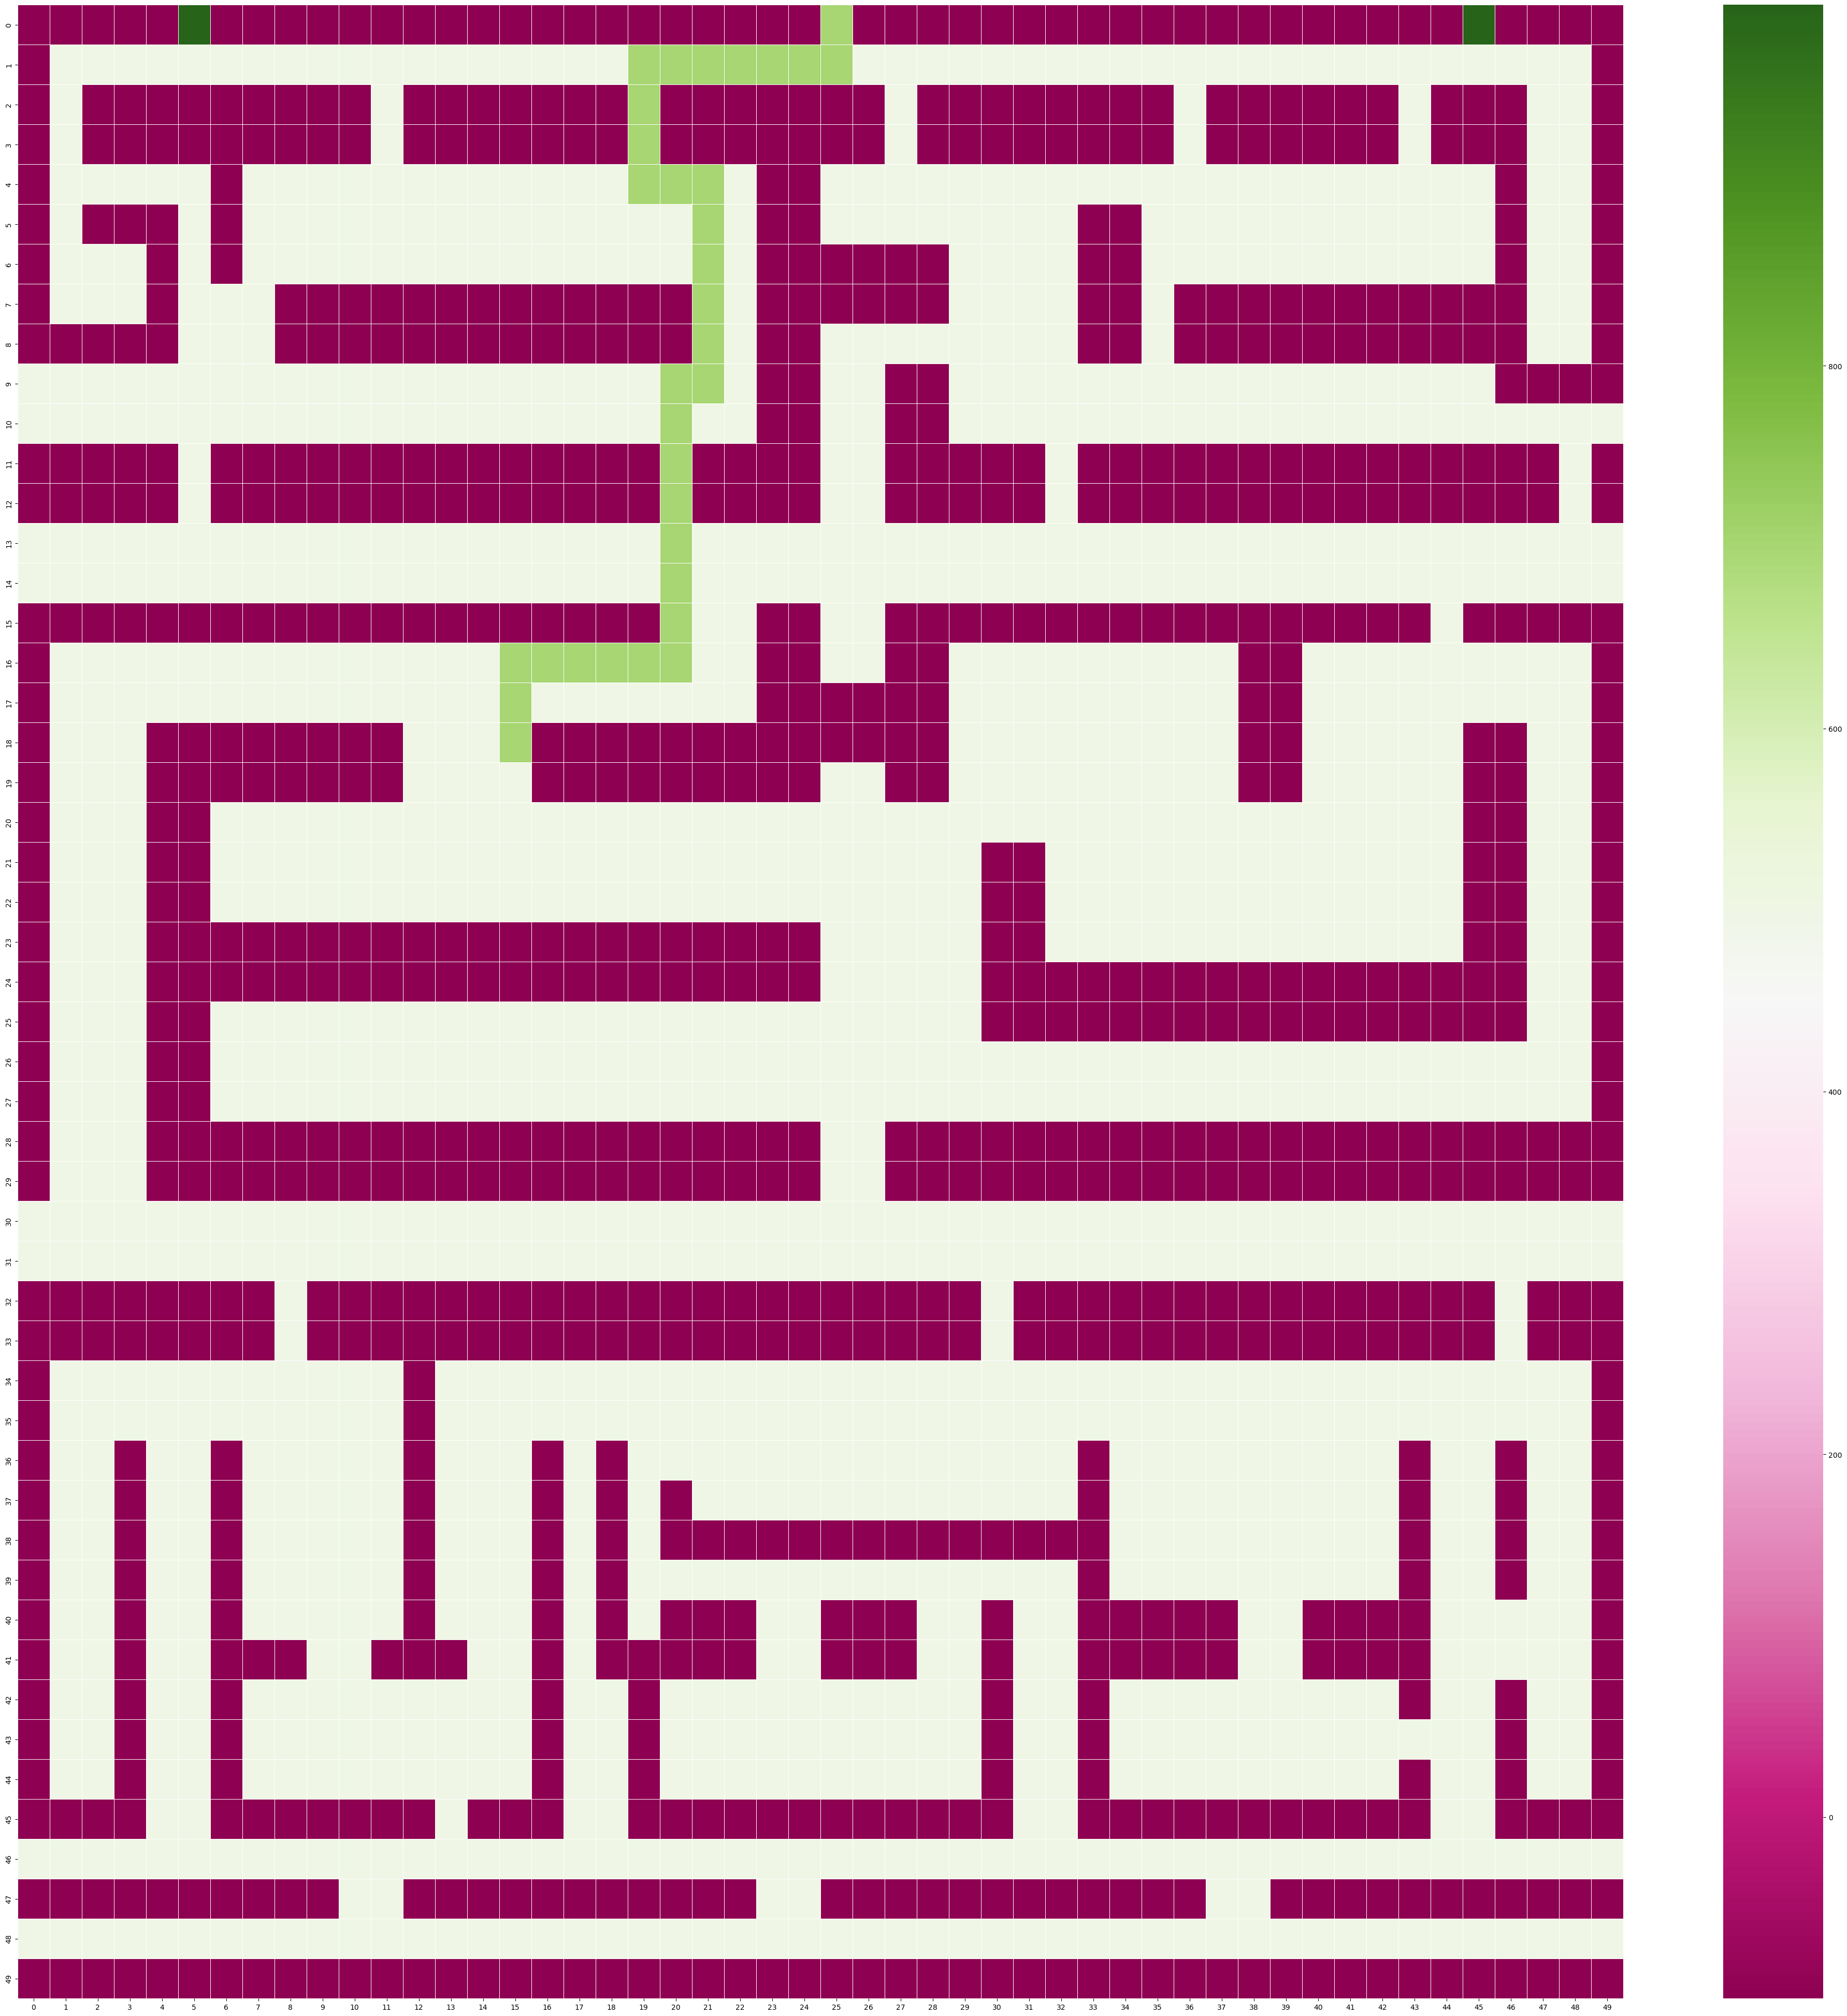

In [18]:
print_path_reversed(path)